<a href="https://colab.research.google.com/github/reidnersousa/IFB_Analise_Algoritmo_2024/blob/main/Analise_Algoritmo_busca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import psutil
import platform

# Informações sobre a CPU
cpu_info = platform.processor()
print("CPU:", cpu_info)

# Informações sobre a memória
mem_info = psutil.virtual_memory()
total_ram = mem_info.total // (1024 ** 3)  # Convertendo bytes para gigabytes
print("Memória RAM Total:", total_ram, "GB")


CPU: x86_64
Memória RAM Total: 12 GB


In [ ]:
!pip --version python


pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
import numpy as np
import matplotlib as mb
print(np.__version__)
print(mb.__version__)

1.25.2
3.7.1


iii 0 10000 10000
[5382 5289 6119 ... 6237 2391 2895]
iii 1 10000 10000
[5382 5289 6119 ... 6237 2391 2895]
nome metodo: busca_sequencial tamanho amostra: 1e+04 tempo 0.012887
iii 0 100000 100000
[50589 42964 82791 ... 86591  9525  8361]
iii 1 100000 100000
[50589 42964 82791 ... 86591  9525  8361]
nome metodo: busca_sequencial tamanho amostra: 1e+05 tempo 0.056001
iii 0 1000000 1000000
[633079 343425 685539 ... 696549 140094 796162]
iii 1 1000000 1000000
[633079 343425 685539 ... 696549 140094 796162]
nome metodo: busca_sequencial tamanho amostra: 1e+06 tempo 0.349170
iii 0 10000000 10000000
[2236338 5672890 8660630 ... 4779396 8515282 2478843]
iii 1 10000000 10000000
[2236338 5672890 8660630 ... 4779396 8515282 2478843]
nome metodo: busca_sequencial tamanho amostra: 1e+07 tempo 4.642646
iii 0 10000 10000
[5382 5289 6119 ... 6237 2391 2895]
iii 1 10000 10000
[5382 5289 6119 ... 6237 2391 2895]
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+04 tempo 0.000127
iii 0 100000 1

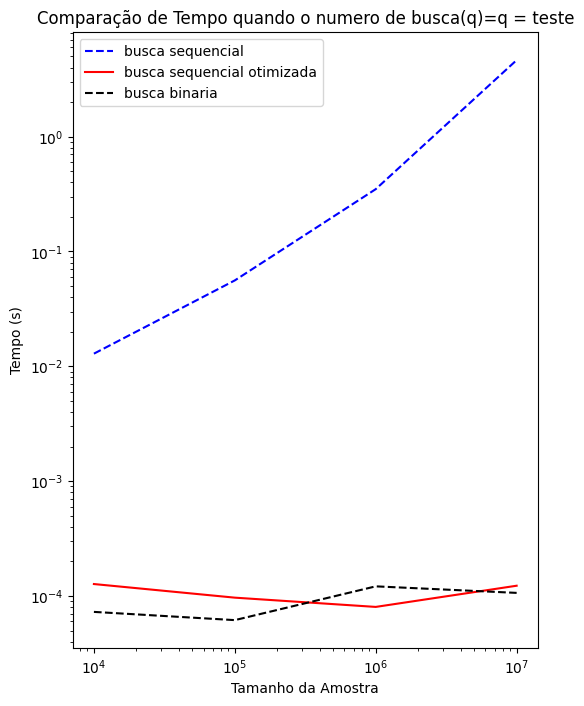

In [16]:

import numpy as np
import random
import timeit
import matplotlib.pyplot as plt

class Manager:
  def __init__(self, input_10_4 , input_10_5,input_10_6,input_10_7,quantidade_buscas,nome):
    random.seed(42)
    self.nome = nome
    self.QTD_REPETICAO_FOR  = quantidade_buscas

    self.input_4 = input_10_4
    self.input_5 = input_10_5
    self.input_6 = input_10_6
    self.input_7 = input_10_7


    self.amostra_10_4 = self.gerando_amostra(input_10_4)
    self.amostra_10_5 = self.gerando_amostra(input_10_5)
    self.amostra_10_6 = self.gerando_amostra(input_10_6)
    self.amostra_10_7 = self.gerando_amostra(input_10_7)


    self.tempo_sequencial =np.empty(0)
    self.calcular_tempo_sequencial()

    self.tempo_sequencial_otimizado = np.empty(0)
    self.calcular_tempo_sequencial_otimizado()



    self.tempo_binaria = np.empty(0)
    self.calcular_tempo_binaria()






  def calcular_tempo_sequencial(self):
    tempo_sequencial = np.zeros(4)

    tempo_sequencial[0] =self.get_time(self.input_4,self.busca_sequencial)
    tempo_sequencial[1] =self.get_time(self.input_5,self.busca_sequencial)
    tempo_sequencial[2] =self.get_time(self.input_6,self.busca_sequencial)
    tempo_sequencial[3]= self.get_time(self.input_7,self.busca_sequencial)


    self.tempo_sequencial = tempo_sequencial

  def calcular_tempo_sequencial_otimizado(self):
    tempo_sequencial_otimizado = np.zeros(4)

    tempo_sequencial_otimizado[0] =self.get_time(self.input_4,self.busca_sequencial_otimizada)
    tempo_sequencial_otimizado[1] =self.get_time(self.input_5,self.busca_sequencial_otimizada)
    tempo_sequencial_otimizado[2] =self.get_time(self.input_6,self.busca_sequencial_otimizada)
    tempo_sequencial_otimizado[3]= self.get_time(self.input_7,self.busca_sequencial_otimizada)


    self.tempo_sequencial_otimizado = tempo_sequencial_otimizado

  def calcular_tempo_binaria(self):
    tempos_binarios = np.zeros(4)

    tempos_binarios[0] = self.get_time(self.input_4, self.busca_binaria)
    tempos_binarios[1] = self.get_time(self.input_5, self.busca_binaria)
    tempos_binarios[2] = self.get_time(self.input_6, self.busca_binaria)
    tempos_binarios[3] = self.get_time(self.input_7, self.busca_binaria)

    self.tempo_binaria = tempos_binarios



  def get_time(self,input,metodo_busca):
    lista_tempo =[]

    for i in range(self.QTD_REPETICAO_FOR):



      if input == 10000:
        amostra = self.amostra_10_4
      elif input == 100000:
        amostra = self.amostra_10_5
      elif input == 1000000:
        amostra = self.amostra_10_6
      elif input == 10000000:
        amostra = self.amostra_10_7



      tempo_sequencial = timeit.timeit(lambda: metodo_busca(amostra),number=1)
      lista_tempo.append(tempo_sequencial)

    soma_do_tempo = np.sum(lista_tempo)

    print("nome metodo: {} tamanho amostra: {:.0e} tempo {:.6f}".format(metodo_busca.__name__, len(amostra), soma_do_tempo))
    return soma_do_tempo

  def gerando_amostra(self,N):
    sequencia = np.random.randint(1, N + 1, N)
    return sequencia

  def busca_sequencial(self,vetor,alvo=None):

    encontrou = False
    if alvo is None:
      alvo = np.random.randint(1,len(vetor)+1)

    for i in range(len(vetor)):

      if vetor[i] == alvo:
        encontrou = True
        break

    return encontrou

  def busca_sequencial_otimizada(self,vetor,alvo = None):
    encontrou = False

    if alvo is None:
      alvo = np.random.randint(1,len(vetor)+1)

    for i in range(len(vetor)):

      if alvo < vetor[i]:
        encontrou = False
        break
      elif alvo ==vetor[i]:

        encontrou = True
        break


    return encontrou

  def busca_binaria(self,vetor,alvo = None):

    if alvo is None:
      alvo = np.random.randint(1,len(vetor)+1)


    primeiro = 0
    ultimo  = len(vetor)-1
    encontrou = False

    while primeiro <= ultimo  and  not encontrou:

      m = (primeiro + ultimo )//2

      if vetor[m]== alvo:

        encontrou = True
        break

      else :

        if vetor[m]< alvo :
          primeiro = m+1

        elif vetor[m]> alvo :
          ultimo = m-1


    return encontrou

  def gerando_grafico(self):
    tamanho =[1e4,1e5,1e6,1e7]
    tempo=[]

    tempo.append(self.tempo_sequencial)
    tempo.append(self.tempo_sequencial_otimizado)
    tempo.append(self.tempo_binaria)

    algoritmo =['busca sequencial','busca sequencial otimizada','busca binaria']
    plt.figure(figsize=(6,8))
    plt.title(f"Comparação de Tempo quando o numero de busca(q)={self.nome}")
    plt.plot(tamanho ,tempo[0] , label=algoritmo[0],color='blue',linestyle='--')
    plt.plot(tamanho ,tempo[1] , label=algoritmo[1],color='red',linestyle='solid')
    plt.plot(tamanho ,tempo[2] , label=algoritmo[2],color='black',linestyle='--')
    plt.xlabel("Tamanho da Amostra")
    plt.ylabel("Tempo (s)")
    plt.xscale("log")
    plt.yscale("log")



    plt.legend()
    plt.savefig(f'grafido_quando_q={self.nome}.png')


teste = Manager(10**4,10**5,10**6,10**7,2,'q = teste')
teste.gerando_grafico()


nome metodo: busca_sequencial tamanho amostra: 1e+04 tempo 0.119621
nome metodo: busca_sequencial tamanho amostra: 1e+05 tempo 1.069564
nome metodo: busca_sequencial tamanho amostra: 1e+06 tempo 11.743573
nome metodo: busca_sequencial tamanho amostra: 1e+07 tempo 116.435263
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+04 tempo 0.002251
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+05 tempo 0.004397
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+06 tempo 0.009277
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+07 tempo 0.007334
nome metodo: busca_binaria tamanho amostra: 1e+04 tempo 0.002003
nome metodo: busca_binaria tamanho amostra: 1e+05 tempo 0.002891
nome metodo: busca_binaria tamanho amostra: 1e+06 tempo 0.004683
nome metodo: busca_binaria tamanho amostra: 1e+07 tempo 0.009541


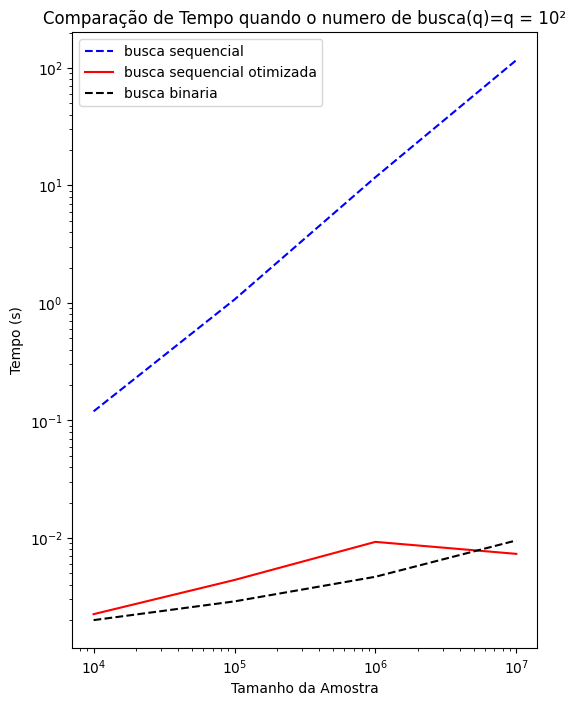

In [4]:
q_10_2 = Manager(10**4,10**5,10**6,10**7,10**2,'q = 10²')
q_10_2.gerando_grafico()

nome metodo: busca_sequencial tamanho amostra: 1e+04 tempo 1.189706
nome metodo: busca_sequencial tamanho amostra: 1e+05 tempo 12.191667
nome metodo: busca_sequencial tamanho amostra: 1e+06 tempo 123.553554
nome metodo: busca_sequencial tamanho amostra: 1e+07 tempo 1166.586956
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+04 tempo 0.023093
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+05 tempo 0.032769
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+06 tempo 0.046614
nome metodo: busca_sequencial_otimizada tamanho amostra: 1e+07 tempo 0.082950
nome metodo: busca_binaria tamanho amostra: 1e+04 tempo 0.021530
nome metodo: busca_binaria tamanho amostra: 1e+05 tempo 0.029714
nome metodo: busca_binaria tamanho amostra: 1e+06 tempo 0.069181
nome metodo: busca_binaria tamanho amostra: 1e+07 tempo 0.096284


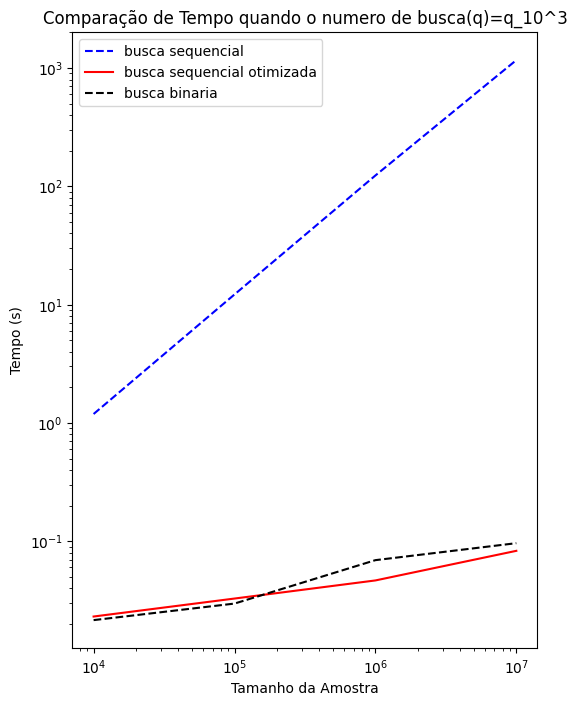

In [5]:
q_10_3 = Manager(10**4,10**5,10**6,10**7,10**3,'q_10^3')
q_10_3.gerando_grafico()

In [6]:
q_10_4 = Manager(10**4,10**5,10**6,10**7,10**4,'q = 10⁴')
q_10_4.gerando_grafico()

nome metodo: busca_sequencial tamanho amostra: 1e+04 tempo 11.779706
nome metodo: busca_sequencial tamanho amostra: 1e+05 tempo 118.051448
nome metodo: busca_sequencial tamanho amostra: 1e+06 tempo 1178.053164


KeyboardInterrupt: 

In [ ]:
q_10_5 = Manager(10**4,10**5,10**6,10**7,10**5,'q = 10⁵')
q_10_5.gerando_grafico()

TypeError: Manager.gerando_grafico() missing 1 required positional argument: 'tempo'

In [ ]:
q_10_6 = Manager(10**4,10**5,10**6,10**7,10**6,'q = 10⁶')
q_10_6.gerando_grafico()

TypeError: Manager.gerando_grafico() missing 1 required positional argument: 'tempo'

In [ ]:
### Algoritmo de busca binaria , primeiro são definidos as variaveis  first(primeiro index ) = 0 , last (ultimo index ) = len(vetor) -1  e  found(encontrou elemento na lista) = False
### enquanto first for menor(<) ou igual(=) ao ultimo  e encontrou for False faz isso:
##### dentro do laço é criado  a variaveil midpoint(meio do vetor) ; midpoint   recebe os valores first mais  ultimo e dividir por dois apos a soma.
###### esse midpoint vai ser o indice do vetor , apos isso será feito uma busca para ve se o elemento alvo e vetor na posição que foi fornecida pelo midpoint são iguais.
###### caso sejam iguais encontrou o elemento no vetor, caso contraririo  e feito uma verificação :
####### primeiro é verificado se o alvo menor que vetor com posição do midpoint , caso seja  a variavel ultimo recebe uma nova atribuição que é midpoint menos um .CAso contrairo
####### e verificado se o alvo maior que vetor com posição do midpoint , caso seja a variavel primeiro recebe uma nova atribuição que é midpoint mais um.
####### Apos uma dessas verificações voltamos para inicio do while onde e feito novamente a atribuição do midpoint , pois agora os valores do primeiro ou ultimo podem de sido alterado assim
####### o valor de midpoint é alterando sendo assim com valor do midpoint alterado significa que o index do vetor é diferente ou seja vai ser feito outra verificação , esse processo do if vai ser executado ate acha o alvo


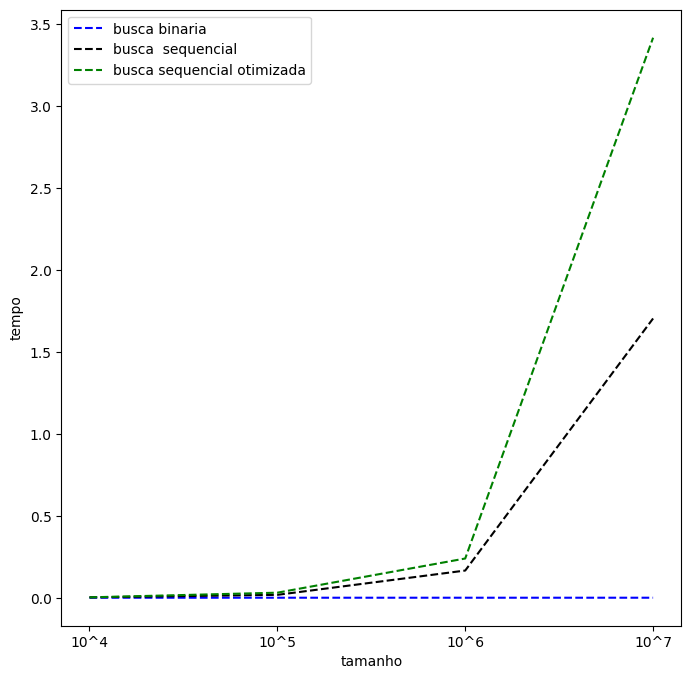

In [ ]:
import matplotlib.pyplot as plt

def gerando_grafico(entrada,tempo,algoritmo):

  plt.figure(figsize=(8,8))
  plt.plot(entrada ,tempo[0] , label=algoritmo[0],color='blue',linestyle='--')
  plt.plot(entrada ,tempo[1] , label=algoritmo[1],color='black',linestyle='--')
  plt.plot(entrada ,tempo[2] , label=algoritmo[2],color='green',linestyle='--')
  plt.xlabel("tamanho")
  plt.ylabel("tempo")

  plt.legend()

input=['10^4','10^5','10^6','10^7']
tempo = []
tempo.append(manager.tempo_binaria)
tempo.append(manager.tempo_sequencial)
tempo.append(manager.tempo_sequencial_otimizado)

algoritmo=['busca binaria','busca  sequencial','busca sequencial otimizada']
gerando_grafico(input,tempo,algoritmo)

[ 1  2  3  4  5  6  7  8  9 10]
10 10 10


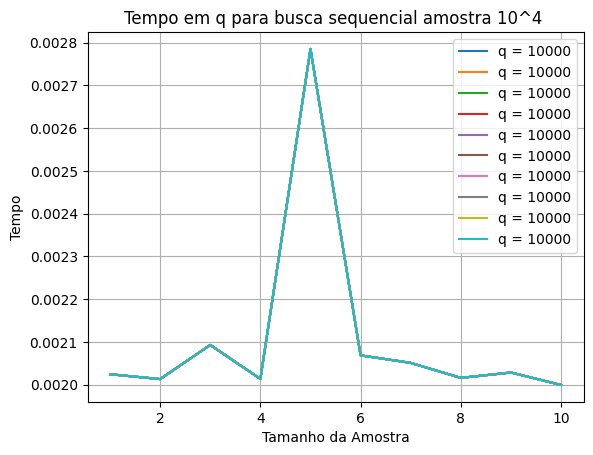

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de q
q_values= [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
tempo=[0.002024149000135367, 0.0020128189999013557, 0.002092673999868566,
 0.002013175999309169, 0.002785223999126174, 0.0020683110005847993,
 0.0020507440003711963, 0.0020156480004516197, 0.002028189000156999,
 0.0019991630006188643]

# Tamanhos da sequência (eixo x)
sequence_sizes = np.arange(1, 11)
 # Suponho que você deseja sequências de tamanho 1 a 100
print(sequence_sizes)

print(len(sequence_sizes),len(tempo),len(q_values))
# Crie um gráfico para cada valor de q
for q in q_values:
    #times = [calculate_time(q, size) for size in sequence_sizes]
    plt.plot(sequence_sizes, tempo, label=f"q = {q}")

plt.xlabel("Tamanho da Amostra")
plt.ylabel("Tempo")
plt.title("Tempo em q para busca sequencial amostra 10^4 ")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import random




def gerando_amostra(N):
  sequencia =[]
  for i in range(N):
    numero_aleatorio = random.randint(1,N)
    sequencia.append(numero_aleatorio)

  #sequencia=sorted(sequencia)
  sequencia = np.array(sequencia)
  sequencia.sort()
  return sequencia

amostra_10_4 = gerando_amostra(10**4)

In [ ]:
import numpy as np


print(amostra_10_4)
def buscar_binaria(vetor,alvo = None):
  q = 0
  if alvo is None:
    alvo = random.randint(1,len(vetor))

  tamanho_vetor = len(vetor)
  inicial = 0
  ultimo  = tamanho_vetor-1
  encontrou = False
  x = alvo

  while inicial <= ultimo :
    q =q +1
    m = (inicial + ultimo )//2

    if vetor[m]== x:

      return True
    elif vetor[m]< x :
        inicial = m+1
    elif vetor[m]> x :
      ultimo = m-1
  else :
    return False

achou=buscar_binaria(amostra_10_4)
print(achou)

[    1     3     3 ...  9997  9998 10000]
True


In [ ]:
def busca_sequencial(vetor,alvo=None):
    q = 0
    encontrou = False
    if alvo is None:
      alvo = random.randint(1,len(vetor))
      print(alvo)
    for i in range(len(vetor)):
      q = q+1
      if vetor[i] == alvo:
        encontrou = True
    return encontrou

print(amostra_10_4)
a = busca_sequencial(amostra_10_4,3)
print(a)

[    3     4     5 ...  9999 10000 10000]
True


In [ ]:

def busca_sequencial_otimizada(vetor,alvo = None):
  encontrou = False
  q = 0
  if alvo is None:
    alvo = random.randint(1,len(vetor))
  for i in range(len(vetor)):
    if alvo < vetor[i]:
      encontrou = False
    elif alvo ==vetor[i]:
      q = q + 1
      encontrou = True
  return encontrou
print(amostra_10_4)
b = busca_sequencial_otimizada(amostra_10_4,3)
b

[    3     4     5 ...  9999 10000 10000]


False